In [106]:
import os
import json
import pandas as pd
from dotenv import load_dotenv
dotenv_local_path = '../.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True)

True

# Explore NOAA API Using requests

In [6]:
import requests

In [11]:
# Get list of all available datasets
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = './data/datasets_all.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)
    
"""
The results contain the Daily Summaries dataset:
{
"datacoverage": 1,
"id": "GHCND",
"maxdate": "2020-11-22",
"mindate": "1763-01-01",
"name": "Daily Summaries",
"uid": "gov.noaa.ncdc:C00861"
}

Daily Summaries seems interesting, so let's focus on it for our analysis.
"""

'\nThe results contain the Daily Summaries dataset:\n{\n"datacoverage": 1,\n"id": "GHCND",\n"maxdate": "2020-11-22",\n"mindate": "1763-01-01",\n"name": "Daily Summaries",\n"uid": "gov.noaa.ncdc:C00861"\n}\n\nDaily Summaries seems interesting, so let\'s focus on it for our analysis.\n'

In [12]:
# Get all locations in the world
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locations&limit=10"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = './data/locations_all.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)
    
"""
The results contain the following structure:
{
"datacoverage": 0.9958,
"id": "CITY:AE000001",
"maxdate": "2020-11-18",
"mindate": "1983-01-01",
"name": "Abu Dhabi, AE"
}

The id key will likely be important for accessing data for a particular city.
"""

'\nThe results contain the following structure:\n{\n"datacoverage": 0.9958,\n"id": "CITY:AE000001",\n"maxdate": "2020-11-18",\n"mindate": "1983-01-01",\n"name": "Abu Dhabi, AE"\n}\n\nThe id key will likely be important for accessing data for a particular city.\n'

In [14]:
# Get all locations in the US
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locationcategoryid=ST&limit=52"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = './data/locations_us.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

"""
The results contain the CA location:
{
"datacoverage": 1,
"id": "FIPS:06",
"maxdate": "2020-11-22",
"mindate": "1850-10-01",
"name": "California"
}
"""

'\nThe results contain the CA location:\n{\n"datacoverage": 1,\n"id": "FIPS:06",\n"maxdate": "2020-11-22",\n"mindate": "1850-10-01",\n"name": "California"\n}\n'

In [22]:
# Get list of all available stations for CA location
"""
Note the use of an offset. This is required because each request can handle a maximum of 1000 results.
The metadata key in the request tells us how many results there are:
"metadata": {
    "resultset": {
    "count": 4346,
    "limit": 1000,
    "offset": 1
    }
}

We need 5 files because we have 4346 results.

Also note that the url contains a parameter for sorting the results. We used descending just as an example.
"""

offset_counter=1
file_counter=0

while file_counter < 5:
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&sortfield=name&sortorder=desc&limit=1000" +"&offset=" + str(offset_counter)
    headers = {"token":os.environ.get('NOAA_Token')}
    response = requests.get(url, headers=headers)
    data = response.json()
    
    file_path = f'./data/stations_ca_{file_counter}.json'
    
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4, sort_keys=True)
        
    offset_counter+=1000
    file_counter+=1

"""
The results contain the OAKLAND NORTH CALIFORNIA location:
{
"datacoverage": 0.9704,
"elevation": 427.6,
"elevationUnit": "METERS",
"id": "GHCND:USR0000COKN",
"latitude": 37.865,
"longitude": -122.2208,
"maxdate": "2020-11-22",
"mindate": "1992-06-08",
"name": "OAKLAND NORTH CALIFORNIA, CA US"
}

We will use Oakland because it contains a relatively long dataset and is still active today.
"""

'\nThe results contain the OAKLAND NORTH CALIFORNIA location:\n{\n"datacoverage": 0.9704,\n"elevation": 427.6,\n"elevationUnit": "METERS",\n"id": "GHCND:USR0000COKN",\n"latitude": 37.865,\n"longitude": -122.2208,\n"maxdate": "2020-11-22",\n"mindate": "1992-06-08",\n"name": "OAKLAND NORTH CALIFORNIA, CA US"\n}\n\nWe will use Oakland because it contains a relatively long dataset and is still active today.\n'

In [25]:
# Get list of all available stations for CA location that support the Daily Summaries dataset
# and are active today

"""
Since there are only 255 results, we don't need a loop:
"metadata": {
"resultset": {
"count": 255,
"limit": 1000,
"offset": 1
    }
}
"""

url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?locationid=FIPS:06&sortfield=name&sortorder=desc&datasetid=GHCND&startdate=2020-11-22&enddate=2000-01-01&limit=1000"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = f'./data/stations_ca_ghcnd.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

"""
The results contain the OAKLAND NORTH CALIFORNIA station:
{
"datacoverage": 0.9704,
"elevation": 427.6,
"elevationUnit": "METERS",
"id": "GHCND:USR0000COKN",
"latitude": 37.865,
"longitude": -122.2208,
"maxdate": "2020-11-22",
"mindate": "1992-06-08",
"name": "OAKLAND NORTH CALIFORNIA, CA US"
}
"""

'\nThe results contain the OAKLAND NORTH CALIFORNIA station:\n{\n"datacoverage": 0.9704,\n"elevation": 427.6,\n"elevationUnit": "METERS",\n"id": "GHCND:USR0000COKN",\n"latitude": 37.865,\n"longitude": -122.2208,\n"maxdate": "2020-11-22",\n"mindate": "1992-06-08",\n"name": "OAKLAND NORTH CALIFORNIA, CA US"\n}\n'

In [27]:
# Get list of all available datasets for the OAKLAND NORTH CALIFORNIA station
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets?stationid=GHCND:USR0000COKN"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = './data/datasets_ca_oakland.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

"""
The results do in fact contain the Daily Summaries dataset for the OAKLAND NORTH CALIFORNIA station:
{
"datacoverage": 1,
"id": "GHCND",
"maxdate": "2020-11-22",
"mindate": "1763-01-01",
"name": "Daily Summaries",
"uid": "gov.noaa.ncdc:C00861"
}
"""

'\nThe results do in fact contain the Daily Summaries dataset for the OAKLAND NORTH CALIFORNIA station:\n{\n"datacoverage": 1,\n"id": "GHCND",\n"maxdate": "2020-11-22",\n"mindate": "1763-01-01",\n"name": "Daily Summaries",\n"uid": "gov.noaa.ncdc:C00861"\n}\n\n'

In [29]:
# Finally, we can get the Daily Summaries for the OAKLAND NORTH CALIFORNIA station
"""
The data below is for Jan 2020 only.
"""

url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USR0000COKN&startdate=2020-01-01&enddate=2020-01-31&units=standard&limit=1000"
headers = {"token":os.environ.get('NOAA_Token')}
response = requests.get(url, headers=headers)
data = response.json()

file_path = './data/daily_summaries_ca_oakland.json'

with open(file_path, 'w') as f:
    json.dump(data, f, indent=4, sort_keys=True)

## Load Data into Python

In [31]:
# Load data

file_path = './data/daily_summaries_ca_oakland.json'

with open(file_path, 'r') as f:
    data = json.load(f)

data

{'metadata': {'resultset': {'count': 93, 'limit': 1000, 'offset': 1}},
 'results': [{'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 51.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMAX',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 59.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMIN',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 46.0},
  {'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 53.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMAX',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 61.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMIN',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 46.0},
  {'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-03T00:00:00',
   'station': 'G

In [32]:
# We can simpligy the above action by creating a function
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [33]:
# Apply the function to read daily_summaries_ca_oakland.json
file_path = './data/daily_summaries_ca_oakland.json'

json_contents = read_json(file_path)
json_contents

{'metadata': {'resultset': {'count': 93, 'limit': 1000, 'offset': 1}},
 'results': [{'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 51.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMAX',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 59.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMIN',
   'date': '2020-01-01T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 46.0},
  {'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 53.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMAX',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 61.0},
  {'attributes': 'H,,U,',
   'datatype': 'TMIN',
   'date': '2020-01-02T00:00:00',
   'station': 'GHCND:USR0000COKN',
   'value': 46.0},
  {'attributes': ',,U,',
   'datatype': 'TAVG',
   'date': '2020-01-03T00:00:00',
   'station': 'G

In [34]:
# Convert json_contents into pandas dataframe
# Note, we are after the content in the results key
df_ds = pd.DataFrame(json_contents["results"])
df_ds.head(10)

,attributes,datatype,date,station,value
0,",,U,",TAVG,2020-01-01T00:00:00,GHCND:USR0000COKN,51.0
1,"H,,U,",TMAX,2020-01-01T00:00:00,GHCND:USR0000COKN,59.0
2,"H,,U,",TMIN,2020-01-01T00:00:00,GHCND:USR0000COKN,46.0
3,",,U,",TAVG,2020-01-02T00:00:00,GHCND:USR0000COKN,53.0
4,"H,,U,",TMAX,2020-01-02T00:00:00,GHCND:USR0000COKN,61.0
5,"H,,U,",TMIN,2020-01-02T00:00:00,GHCND:USR0000COKN,46.0
6,",,U,",TAVG,2020-01-03T00:00:00,GHCND:USR0000COKN,53.0
7,"H,,U,",TMAX,2020-01-03T00:00:00,GHCND:USR0000COKN,60.0
8,"H,,U,",TMIN,2020-01-03T00:00:00,GHCND:USR0000COKN,47.0
9,",,U,",TAVG,2020-01-04T00:00:00,GHCND:USR0000COKN,48.0


In [35]:
# Organize data by date
df_ds = df_ds.pivot('date','datatype','value').reset_index()
df_ds = df_ds.rename_axis(None,axis=1)
df_ds.head(10)

,date,TAVG,TMAX,TMIN
0,2020-01-01T00:00:00,51.0,59.0,46.0
1,2020-01-02T00:00:00,53.0,61.0,46.0
2,2020-01-03T00:00:00,53.0,60.0,47.0
3,2020-01-04T00:00:00,48.0,53.0,46.0
4,2020-01-05T00:00:00,47.0,55.0,41.0
5,2020-01-06T00:00:00,49.0,53.0,45.0
6,2020-01-07T00:00:00,48.0,55.0,44.0
7,2020-01-08T00:00:00,46.0,52.0,44.0
8,2020-01-09T00:00:00,44.0,47.0,43.0
9,2020-01-10T00:00:00,47.0,56.0,42.0


In [46]:
from datetime import datetime

In [47]:
df_ds['date'] = df_ds['date'].astype('datetime64[ns]')
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   TAVG    31 non-null     float64       
 2   TMAX    31 non-null     float64       
 3   TMIN    31 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 KB


# Load Multiple Files into Python Using os.walk( )

In [78]:
# Get the Daily Summaries for the OAKLAND NORTH CALIFORNIA station for 1 month in multiple files
"""
We need 3 files if we with an offset of 31 (1095/31)

"metadata": {
    "resultset": {
    "count": 93,
    "limit": 31,
    "offset": 1
    }
}
"""
offset_counter=1
file_counter=0

while file_counter < 3:
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USR0000COKN&startdate=2019-01-01&enddate=2019-01-31&units=standard&limit=31" +"&offset=" + str(offset_counter)
    headers = {"token":os.environ.get('NOAA_Token')}
    response = requests.get(url, headers=headers)
    data = response.json()

    file_path = f'./data/Oakland/daily_summaries_ca_oakland_{file_counter}.json'

    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4, sort_keys=True)
    
    offset_counter+=31
    file_counter+=1

In [93]:
# Define function to read JSON files
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [96]:
# Define function to go traverse through directory and join JSON files
def read_all_json_files(folder_path):
    for dirpath, dirnames, filenames in os.walk(folder_path):
        results_list = []
        for f in filenames:
            if f.endswith('.json'):
                json_contents = read_json(os.path.join(folder_path,f))
                for i in json_contents['results']:
                    results_list.append(i)
        #df = pd.DataFrame(results_list)
        #return df
        return results_list

In [97]:
# Apply functions to read all JSON files in Oakland directory
folder_path = './data/Oakland/'
ds_combined = read_all_json_files(folder_path)
ds_combined

[{'attributes': ',,U,',
  'datatype': 'TAVG',
  'date': '2019-01-01T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 43.0},
 {'attributes': 'H,,U,',
  'datatype': 'TMAX',
  'date': '2019-01-01T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 49.0},
 {'attributes': 'H,,U,',
  'datatype': 'TMIN',
  'date': '2019-01-01T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 36.0},
 {'attributes': ',,U,',
  'datatype': 'TAVG',
  'date': '2019-01-02T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 45.0},
 {'attributes': 'H,,U,',
  'datatype': 'TMAX',
  'date': '2019-01-02T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 49.0},
 {'attributes': 'H,,U,',
  'datatype': 'TMIN',
  'date': '2019-01-02T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 39.0},
 {'attributes': ',,U,',
  'datatype': 'TAVG',
  'date': '2019-01-03T00:00:00',
  'station': 'GHCND:USR0000COKN',
  'value': 43.0},
 {'attributes': 'H,,U,',
  'datatype': 'TMAX',
  'date': '2019-01-03T00:00:00',

In [104]:
# Create dataframe
df_ds_combined = pd.DataFrame(ds_combined)
df_ds_combined

,attributes,datatype,date,station,value
0,",,U,",TAVG,2019-01-01T00:00:00,GHCND:USR0000COKN,43.0
1,"H,,U,",TMAX,2019-01-01T00:00:00,GHCND:USR0000COKN,49.0
2,"H,,U,",TMIN,2019-01-01T00:00:00,GHCND:USR0000COKN,36.0
3,",,U,",TAVG,2019-01-02T00:00:00,GHCND:USR0000COKN,45.0
4,"H,,U,",TMAX,2019-01-02T00:00:00,GHCND:USR0000COKN,49.0
...,...,...,...,...,...
88,"H,,U,",TMAX,2019-01-30T00:00:00,GHCND:USR0000COKN,62.0
89,"H,,U,",TMIN,2019-01-30T00:00:00,GHCND:USR0000COKN,46.0
90,",,U,",TAVG,2019-01-31T00:00:00,GHCND:USR0000COKN,52.0
91,"H,,U,",TMAX,2019-01-31T00:00:00,GHCND:USR0000COKN,57.0


In [105]:
# Organize dataframe data by date
df_ds_combined = df_ds_combined.pivot('date','datatype','value').reset_index()
df_ds_combined = df_ds_combined.rename_axis(None,axis=1)
df_ds_combined.head(10)

,date,TAVG,TMAX,TMIN
0,2019-01-01T00:00:00,43.0,49.0,36.0
1,2019-01-02T00:00:00,45.0,49.0,39.0
2,2019-01-03T00:00:00,43.0,47.0,39.0
3,2019-01-04T00:00:00,45.0,54.0,41.0
4,2019-01-05T00:00:00,47.0,49.0,44.0
5,2019-01-06T00:00:00,46.0,52.0,43.0
6,2019-01-07T00:00:00,48.0,56.0,44.0
7,2019-01-08T00:00:00,50.0,53.0,45.0
8,2019-01-09T00:00:00,51.0,53.0,48.0
9,2019-01-10T00:00:00,49.0,59.0,45.0


In [108]:
import matplotlib.pyplot as plt

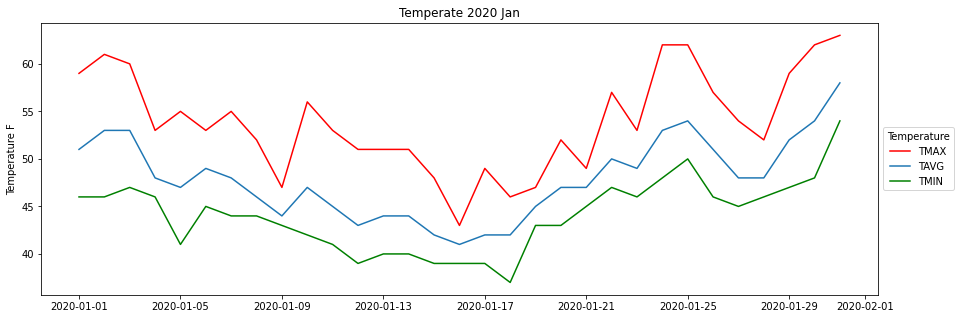

In [119]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df_ds.date, df_ds.TMAX, color='red')
ax.plot(df_ds.date, df_ds.TAVG)
ax.plot(df_ds.date, df_ds.TMIN, color='green')
ax.set_ylabel('Temperature F')
ax.set_title('Temperate 2020 Jan')

ax.legend(
    title = 'Temperature',
    labels = ['TMAX', 'TAVG', 'TMIN'],
    loc = 'center left',
    bbox_to_anchor = (1,.5,0,0)
)

plt.show()